In [1]:
import itertools
import copy
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import pickle
import random

In [2]:
import functions.plotting as NNplt
from functions.rnn_sequences import generate_sequences, convert_seq2inputs

# RNN

In [3]:
class OneStepRNN(nn.Module):

    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(OneStepRNN, self).__init__()
        # Define parameters
        self.rnn = torch.nn.RNN(input_size=input_size,
                        hidden_size=hidden_size,
                        num_layers= num_layers,
                        batch_first=True)
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        # Define the layers
        self.input2hidden = nn.Linear(input_size + self.hidden_size, self.hidden_size)
        self.fc1tooutput = nn.Linear(self.hidden_size, output_size)

    def forward(self, x, hidden):
        combined = torch.cat((x, hidden), dim=0) ## dim = 1??
        self.hidden = nn.functional.relu(self.input2hidden(combined))
        self.output = self.fc1tooutput(self.hidden)
        #return self.output.view(-1,output_size), self.hidden
        return self.output, self.hidden

    def get_activations(self, x, hidden):
        self.forward(x, hidden)  # update the activations with the particular input
        return self.hidden, self.output #, self.fc1_activations

    def get_noise(self):
        return self.hidden_noise

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)[0]


def train(sequence,label,model,optimizer,criterion):

    optimizer.zero_grad()
    #Read each cue in and keep hidden state for next cue
    hidden = model.initHidden()
    for i in range(len(sequence[0])):
        output, hidden = model.forward(sequence[0][i], hidden)
    #Compare final output to target
    loss = criterion(output,label)#.long())
    #Back-propagate
    loss.backward()
    optimizer.step()

    return output, loss.item()

def run(model, train_data, epochs):

    model.train()
    loss_history = []
    for epoch in range(epochs):
        lossTotal = []
        ys = []
        for x,y in train_data:
            output, loss = train(x,y,model,optimizer,criterion)
            lossTotal.append(loss) # append MSE
            ys.append(y.item())
        cv_rmse = np.mean(lossTotal)**0.5/np.mean(ys) # CV_RMSE = RMSE/y_mu
        loss_history.append(cv_rmse)
        
        ### TODO: better CV(RMSE) = RMSE/mean

    print(f'CV_RMSE: {round(cv_rmse*100, 1)} %')
    return loss_history



# Generate Data

In [10]:
operators = ['+', '*']
input_ids = ['A', 'B', 'C', 'D'] 
init_values = [1,6]
convert_inputcue = {'A': 2, 
                    'B': 3,
                    'C': 5,
                    'D': 7}

# 1 step
len_seq = 1
seq_1 = generate_sequences(operators, input_ids, len_seq, init_values)
seqs_1 = convert_seq2inputs(seq_1, num_classes=13, seq_len=3, stages = True)
train_data_1 = DataLoader(seqs_1, batch_size=1, shuffle=True)

# 2 step
len_seq = 2
seq_2 = generate_sequences(operators, input_ids, len_seq, init_values)
seqs_2 = convert_seq2inputs(seq_2, num_classes=13, seq_len=5, stages = True)
train_data_2 = DataLoader(seqs_2, batch_size=1, shuffle=True)

# 2 step primitive
len_seq = 2
input_ids = [2,3,5,7] 
seq_prim = generate_sequences(operators, input_ids, len_seq, init_values, cue_dict = False)
seqs_prim = convert_seq2inputs(seq_prim, num_classes=13, seq_len=5, primitive_type = 'op',stages = True)
train_data_prim = DataLoader(seqs_prim, batch_size=1, shuffle=True)

print('1step: ', len(seqs_1))
print('2step: ', len(seqs_2))
print('2 step prim: ', len(seqs_prim))

ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
ooooo
oooo

# Run Model

In [13]:
# Parameters

num_classes = 13
input_size = num_classes
output_size = 1
hidden_size = 20
num_layers = 1
epochs = 250
learningRate = 0.005

In [41]:
num_sims = 100
epochs = 300

## train on 3 task 200, 200, 200
losses_prim = []
for j in range(num_sims):
    print('### rep', j, ' ###')
    model = OneStepRNN(input_size, output_size, hidden_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
    loss1 = run(model, train_data_prim, epochs)
    loss2 = run(model, train_data_2, epochs)
    loss12 = loss1+loss2
    losses_prim.append(loss12)
    
## train on 3 task 200, 200, 200
losses_2 = []
for j in range(num_sims):
    print('### rep', j, ' ###')
    model = OneStepRNN(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
    loss2 = run(model, train_data_2, epochs)
    losses_2.append(loss2)
   
save_dir = 'results/op_pretraining/cont_staged_1/'

 # save predictions
fileObject = open(save_dir + 'losses_prim', 'wb')
pickle.dump(losses_prim , fileObject)
fileObject.close()

fileObject = open(save_dir + 'losses_2', 'wb')
pickle.dump(losses_2 , fileObject)
fileObject.close()

### rep 0  ###
CV_RMSE: 19.9 %
CV_RMSE: 12.4 %
### rep 1  ###
CV_RMSE: 23.3 %
CV_RMSE: 5.9 %
### rep 2  ###
CV_RMSE: 27.7 %
CV_RMSE: 6.2 %
### rep 3  ###
CV_RMSE: 16.7 %
CV_RMSE: 12.7 %
### rep 4  ###
CV_RMSE: 9.1 %
CV_RMSE: 10.1 %
### rep 5  ###
CV_RMSE: 15.4 %
CV_RMSE: 16.6 %
### rep 6  ###
CV_RMSE: 16.4 %
CV_RMSE: 16.5 %
### rep 7  ###
CV_RMSE: 21.5 %
CV_RMSE: 7.3 %
### rep 8  ###
CV_RMSE: 11.8 %
CV_RMSE: 5.4 %
### rep 9  ###
CV_RMSE: 15.7 %
CV_RMSE: 4.4 %
### rep 10  ###
CV_RMSE: 28.4 %
CV_RMSE: 9.5 %
### rep 11  ###
CV_RMSE: 31.7 %
CV_RMSE: 7.9 %
### rep 12  ###
CV_RMSE: 18.3 %
CV_RMSE: 3.2 %
### rep 13  ###
CV_RMSE: 18.2 %
CV_RMSE: 5.5 %
### rep 14  ###
CV_RMSE: 12.2 %
CV_RMSE: 9.2 %
### rep 15  ###
CV_RMSE: 20.7 %
CV_RMSE: 4.4 %
### rep 16  ###
CV_RMSE: 13.6 %
CV_RMSE: 7.6 %
### rep 17  ###
CV_RMSE: 13.8 %
CV_RMSE: 7.9 %
### rep 18  ###
CV_RMSE: 43.0 %
CV_RMSE: 4.5 %
### rep 19  ###
CV_RMSE: 13.7 %
CV_RMSE: 3.7 %
### rep 20  ###
CV_RMSE: 14.7 %
CV_RMSE: 10.8 %
### rep 21  ###
CV

In [48]:
losses_prim = np.array(losses_prim).T
losses_2 = np.array(losses_2).T

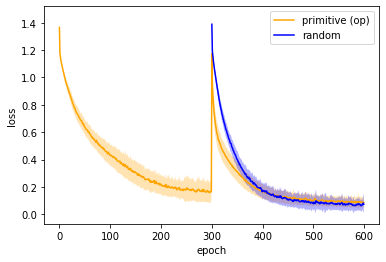

In [49]:
NNplt.plotNN_losses([losses_prim],\
                    labels = ['primitive (op)'],\
                    colors = ['orange'])

NNplt.plotNN_shifted([losses_2],\
                     labels = ['random'],\
                     colors = ['blue'],\
                     shift = 300)